In [1]:
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link

Dataset URL: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link
License(s): other
  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 9.29MB/s]


In [2]:
!unzip /content/cancer-patients-and-air-pollution-a-new-link.zip

Archive:  /content/cancer-patients-and-air-pollution-a-new-link.zip
  inflating: cancer patient data sets.csv  


In [4]:
import pandas as pd

data = pd.read_csv('/content/cancer patient data sets.csv')
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [10]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Co

In [11]:
# 결측치 파악
missing_values = data.isnull().sum
print("결측치 확인")
print(missing_values)

# 중복값 파악
duplicates = data[data.duplicated()]
print("중복값 확인")
print(duplicates)

결측치 확인
<bound method NDFrame._add_numeric_operations.<locals>.sum of      index  Patient Id    Age  Gender  Air Pollution  Alcohol use  \
0    False       False  False   False          False        False   
1    False       False  False   False          False        False   
2    False       False  False   False          False        False   
3    False       False  False   False          False        False   
4    False       False  False   False          False        False   
..     ...         ...    ...     ...            ...          ...   
995  False       False  False   False          False        False   
996  False       False  False   False          False        False   
997  False       False  False   False          False        False   
998  False       False  False   False          False        False   
999  False       False  False   False          False        False   

     Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
0           False      

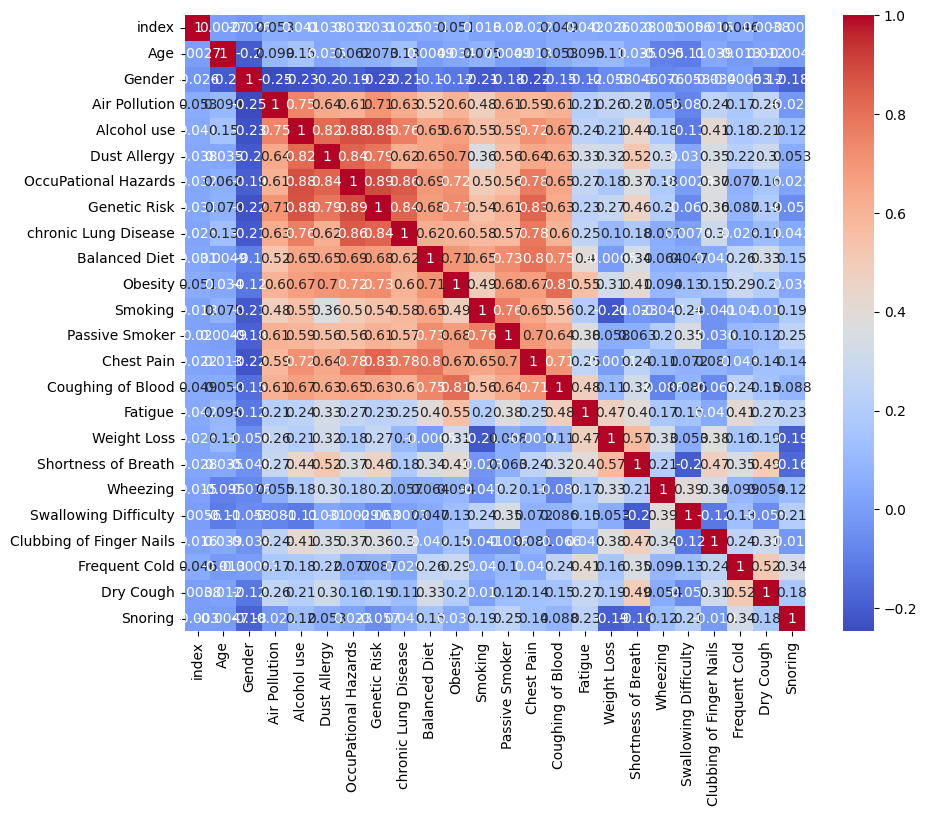

In [12]:
# 상관관계 히트맵

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터만 반영
numerical_data = data.select_dtypes(include=['int64'])

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

- index: 행의 인덱스, 일반적으로 식별 목적으로 사용됩니다.
- Patient Id: 각 환자를 위한 고유 식별자.
- Age: 환자의 나이.
- Gender: 환자의 성별 (0은 여성, 1은 남성으로 코딩되어 있을 가능성이 높음).
- Air Pollution: 대기 오염 노출 수준.
- Alcohol use: 알코올 섭취 빈도 또는 양.
- Dust Allergy: 먼지 알레르기 존재 여부 (0은 없음, 1은 있음으로 표시될 가능성이 높음).
- OccuPational Hazards: 직업적 위험 요소.
- Genetic Risk: 유전적 위험 요소.
- chronic Lung Disease: 만성 폐질환 존재 여부.
- Balanced Diet: 균형 잡힌 식단 섭취 여부.
- Obesity: 비만 여부.
- Smoking: 흡연 여부.
- Passive Smoker: 간접 흡연 여부.
- Chest Pain: 가슴 통증 존재 여부.
- Coughing of Blood: 혈액 기침 여부.
- Fatigue: 피로 여부.
- Weight Loss: 체중 감소 여부.
- Shortness of Breath: 호흡 곤란 여부.
- Wheezing: 쌕쌕거림 여부.
- Swallowing Difficulty: 삼킴 곤란 여부.
- Clubbing of Finger Nails: 손톱 곤봉화 여부.
- Frequent Cold: 잦은 감기 여부.
- Dry Cough: 마른 기침 여부.
- Snoring: 코골이 여부.
- Level: 질병의 심각도 수준 (예: 경증, 중등도, 중증 등).

예측하려는 내용: Lung Cancer Prediction(폐암 예측)
- 특징변수: 건강상태, 증상, 생활습관등을 변수로 사용
- 타겟변수: 페암 진단 결과

In [18]:
# 학습 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 숫자로 인코딩 (Label Encoding)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Level'] = label_encoder.fit_transform(data['Level'])


# 데이터 특징, 타겟 변수 나누기, 특징(X)과 타겟(y)
X = data.drop(columns=['Level', 'Patient Id'])
y = data['Level']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


1. 배깅 (Bagging) - Random Forest

Accuracy: 1.0


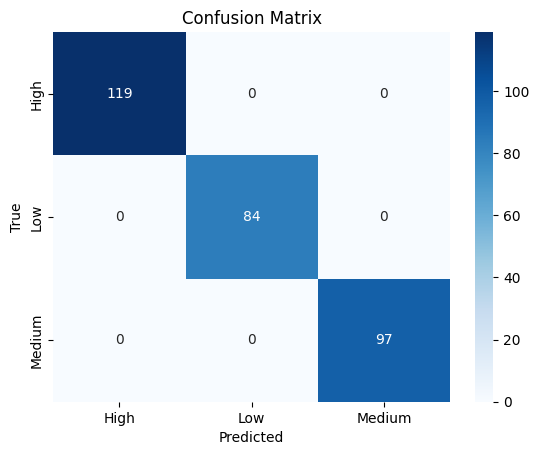

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [21]:
# Random Forest 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

# 모델 예측
y_pred = rf.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
class_names = label_encoder.inverse_transform([0, 1, 2])  # 클래스 이름
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트
print(classification_report(y_test, y_pred, target_names=class_names))


2. 부스팅 (Boosting) - Gradient Boosting

Accuracy: 1.0


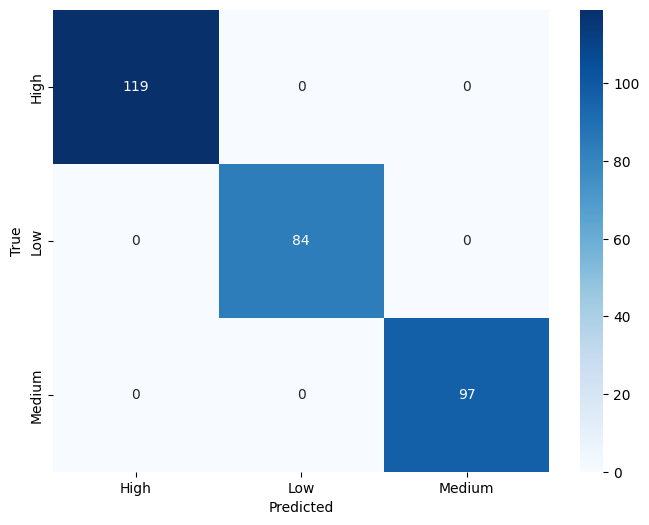

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Gradient Boosting 모델 생성
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb.fit(X_train, y_train)

# 모델 예측
y_pred = gb.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=class_names))


3. 스태킹 (Stacking)


Accuracy: 1.0


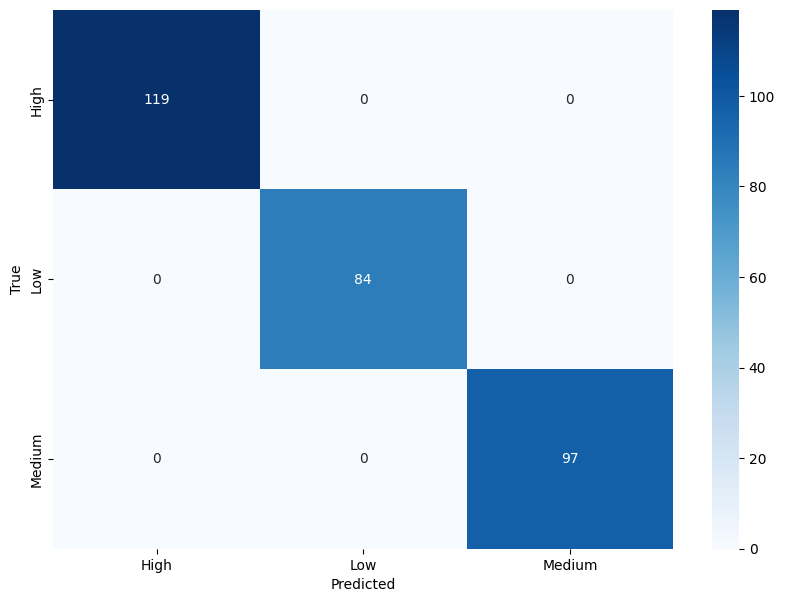

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 기본 모델 정의
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
]

# 스태킹 모델 생성
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 모델 학습
stacking.fit(X_train, y_train)

# 예측 수행
y_pred = stacking.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=class_names))

4. 추천 알고리즘 - 협업 필터링

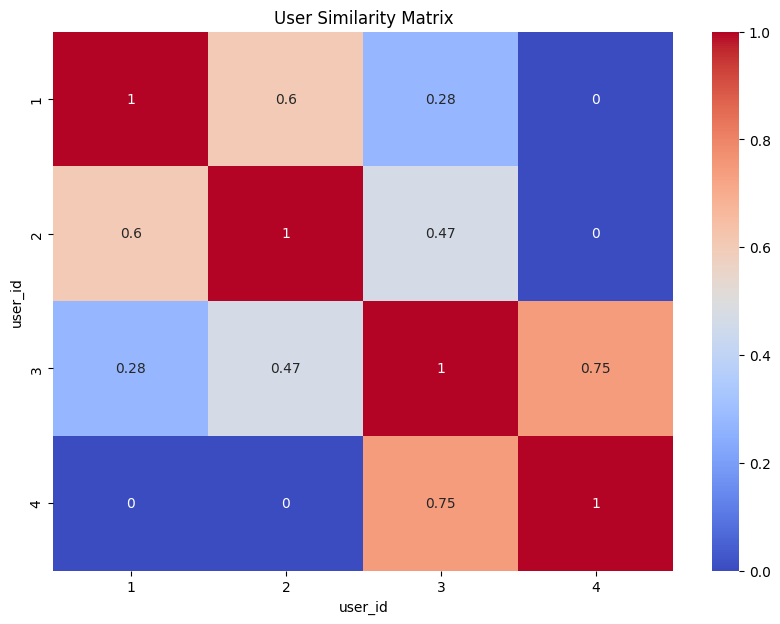

Recommendations for user 1:
item_id
4    2.5
dtype: float64


In [37]:
# 예제 사용자-아이템 매트릭스 생성
from sklearn.metrics.pairwise import cosine_similarity

data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4],
    'item_id': [1, 2, 3, 1, 3, 2, 3, 4, 4],
    'rating': [5, 4, 1, 4, 5, 2, 4, 5, 4]
}
df = pd.DataFrame(data)

# 사용자-아이템 매트릭스 생성
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

# 코사인 유사도를 사용하여 사용자 유사도 계산
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# 유사도 매트릭스 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm')
plt.title('User Similarity Matrix')
plt.show()

# 추천 함수 정의
def recommend(user_id, user_item_matrix, user_similarity, k=2):
    # 유사한 사용자 선택
    similar_users = user_similarity[user_id - 1]
    similar_users_indices = similar_users.argsort()[-k-1:-1]

    # 유사한 사용자들의 아이템 평균 평점 계산
    similar_users_ratings = user_item_matrix.iloc[similar_users_indices]
    recommendations = similar_users_ratings.mean(axis=0)

    # 이미 평가한 아이템 제외
    user_rated_items = user_item_matrix.loc[user_id]
    recommendations = recommendations[user_rated_items == 0]

    return recommendations.sort_values(ascending=False)

# 사용자 1에게 아이템 추천
recommendations = recommend(1, user_item_matrix, user_similarity)
print("Recommendations for user 1:")
print(recommendations)


- Q-learning

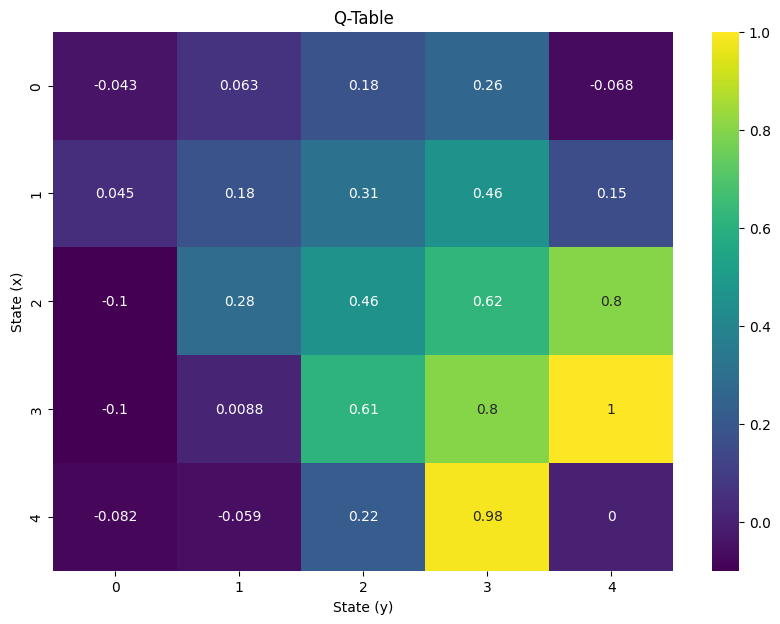

In [40]:
import numpy as np

class GridWorld:
    def __init__(self, size):
        # 그리드의 크기를 설정합니다.
        self.size = size
        # 초기 상태를 (0, 0)으로 설정합니다.
        self.state = (0, 0)
        # 목표 상태를 그리드의 오른쪽 아래 모서리로 설정합니다.
        self.goal = (size-1, size-1)

    def reset(self):
        # 상태를 초기 상태로 리셋합니다.
        self.state = (0, 0)
        return self.state

    def step(self, action):
        # 현재 상태의 x, y 좌표를 가져옵니다.
        x, y = self.state
        # 행동에 따라 새로운 상태를 결정합니다.
        if action == 0:
            x = max(0, x - 1)  # 위로 이동
        elif action == 1:
            x = min(self.size - 1, x + 1)  # 아래로 이동
        elif action == 2:
            y = max(0, y - 1)  # 왼쪽으로 이동
        elif action == 3:
            y = min(self.size - 1, y + 1)  # 오른쪽으로 이동

        # 새로운 상태를 설정합니다.
        self.state = (x, y)
        # 새로운 상태가 목표 상태인지 확인합니다.
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        # 새로운 상태, 보상, 완료 여부를 반환합니다.
        return self.state, reward, done

# Q-learning 파라미터 설정
size = 5  # 그리드의 크기
env = GridWorld(size)  # 그리드월드 환경 생성
q_table = np.zeros((size, size, 4))  # Q-테이블 초기화 (상태-행동 가치 함수)
alpha = 0.1  # 학습률
gamma = 0.9  # 할인 인자
epsilon = 0.1  # 탐험 확률
episodes = 1000  # 학습 에피소드 수

# Q-learning 알고리즘
for episode in range(episodes):
    state = env.reset()  # 에피소드 시작 시 상태를 초기화
    done = False  # 에피소드가 끝났는지 여부

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # 탐험: 무작위로 행동 선택
        else:
            action = np.argmax(q_table[state[0], state[1]])  # 활용: Q-값이 최대인 행동 선택

        next_state, reward, done = env.step(action)  # 환경에서 행동 수행
        q_value = q_table[state[0], state[1], action]  # 현재 상태의 Q-값
        best_next_q_value = np.max(q_table[next_state[0], next_state[1]])  # 다음 상태에서의 최대 Q-값

        # Q-테이블 업데이트
        q_table[state[0], state[1], action] = q_value + alpha * (reward + gamma * best_next_q_value - q_value)

        state = next_state  # 상태 업데이트

# Q-테이블 시각화
# Q-learning 알고리즘에서 사용하는 상태-행동 가치 함수(State-Action Value Function)를 저장하는 테이블
# Q-테이블의 각 항목은 특정 상태에서 특정 행동을 취했을 때의 기대 보상을 나타냄
plt.figure(figsize=(10, 7))
sns.heatmap(np.max(q_table, axis=2), annot=True, cmap='viridis')
plt.title('Q-Table')
plt.xlabel('State (y)')
plt.ylabel('State (x)')
plt.show()

5. 하이퍼 파라미터 튜닝 (Hyperparameter Tuning) - Grid Search


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01

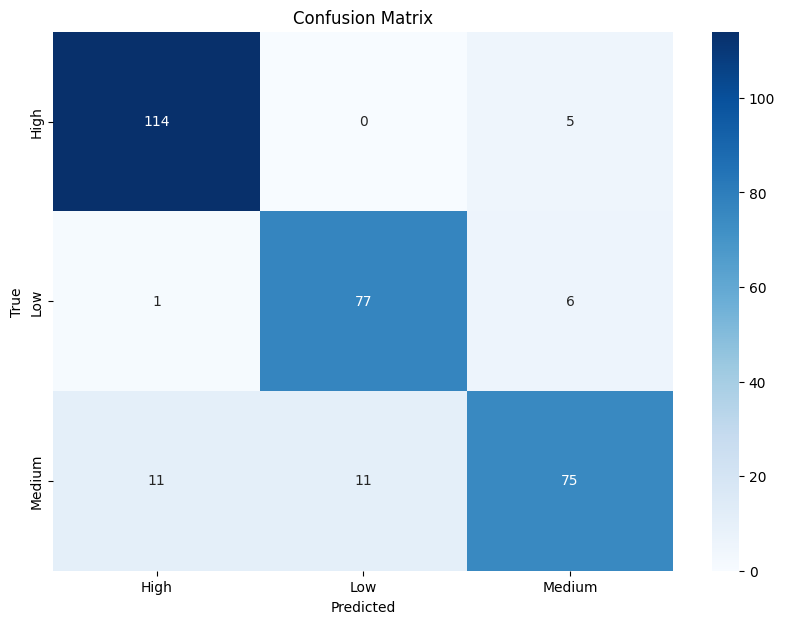

              precision    recall  f1-score   support

        High       0.90      0.96      0.93       119
         Low       0.88      0.92      0.90        84
      Medium       0.87      0.77      0.82        97

    accuracy                           0.89       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.89      0.88       300



In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SVM 모델 생성
svc = SVC()

# 하이퍼 파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid Search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f'Best Parameters: {grid.best_params_}')

# 테스트 데이터로 예측 수행
y_pred = grid.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=class_names))